In [82]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [83]:
%matplotlib inline

In [84]:
# upload omnious and FIT dataset

oms_data_path = '../dataset/omnious_data.json' # omnious dataset(group)
oms_data_all_path = '../dataset/omnious_data_all.json' # omnious dataset(group all)
oms_data_fashion_element_path = '../dataset/omnious_data_fashion_element.json' # omnious dataset group by fashion elements
FIT_data_path = '../dataset/FIT_data.json' # FIT dataset (dataset used in KERN paper)

# loading json files 
oms_data = json.load(open(oms_data_path))
oms_data_all = json.load(open(oms_data_all_path))
oms_data_fl = json.load(open(oms_data_fashion_element_path))
FIT_data = json.load(open(FIT_data_path))

FIT dataset size : (1056960,), number of groups : 74
omnious dataset size : (1046320,), number of groups : 40


[Text(0.5, 0, 'Omnious Dataset'), Text(0, 0.5, 'Score')]

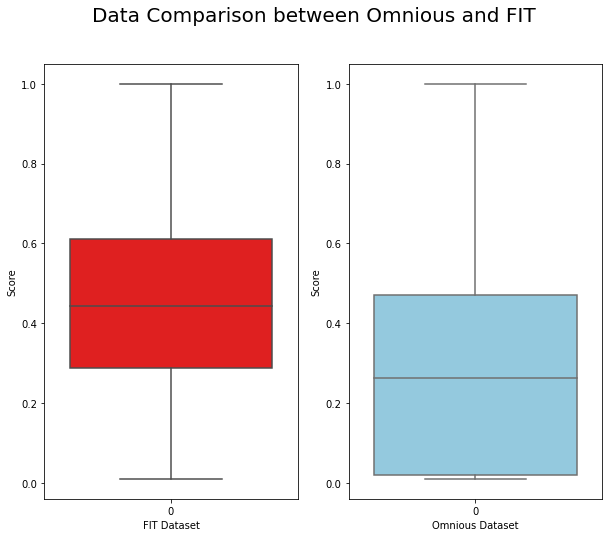

In [85]:
# dataset comparison (omnious vs FIT) with box-plot

oms_all = []
FIT_all = []

num_fit_group = 0
for group, res in FIT_data.items():
    num_fit_group += 1
    for ele, seq in res.items():
        FIT_all.extend([x[1] for x in seq])

print(f"FIT dataset size : {np.shape(FIT_all)}, number of groups : {num_fit_group}")

num_oms_group = 0
for group, res in oms_data.items():
    num_oms_group += 1
    for ele, seq in res.items():
        oms_all.extend([x[1] for x in seq])

print(f"omnious dataset size : {np.shape(oms_all)}, number of groups : {num_oms_group}")

# visualize results with box-plot
fig, axes = plt.subplots(1, 2, figsize=(10, 8))
fig.suptitle('Data Comparison between Omnious and FIT', fontsize=20)
# FIT dataset
sns.boxplot(data=FIT_all, ax=axes[0], color='red').set(xlabel='FIT Dataset', ylabel='Score')
# Omnious dataset
sns.boxplot(data=oms_all, ax=axes[1], color='skyblue').set(xlabel='Omnious Dataset', ylabel='Score')



[Text(0.5, 0, 'group by users'), Text(0, 0.5, 'Score')]

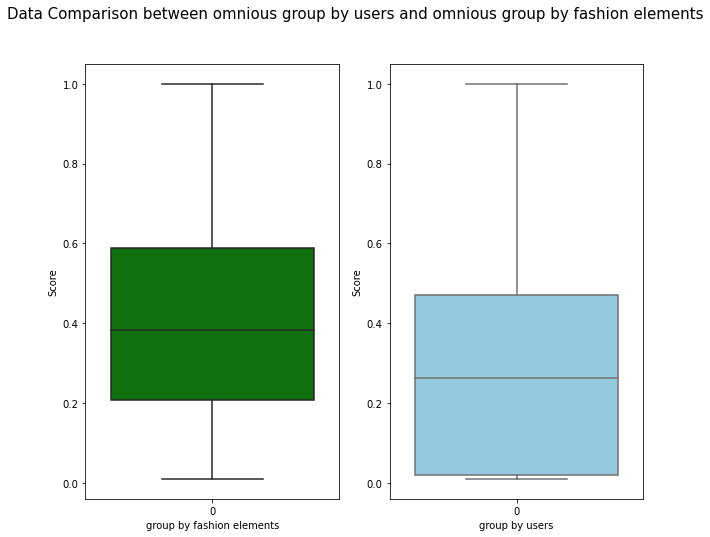

In [86]:
#Box-plot omnious data group by fashion elements
oms_fl_all = []
for element, seq in oms_data_fl.items():
    oms_fl_all.extend([x[1] for x in seq])

# visualize results with box-plot
fig, axes = plt.subplots(1, 2, figsize=(10, 8))
fig.suptitle('Data Comparison between omnious group by users and omnious group by fashion elements', fontsize=15)
# omnious dataset group by fashion elemnts
sns.boxplot(data=oms_fl_all, ax=axes[0], color='green').set(xlabel='group by fashion elements', ylabel='Score')
# Omnious dataset group by users
sns.boxplot(data=oms_all, ax=axes[1], color='skyblue').set(xlabel='group by users', ylabel='Score')


In [6]:
# Visualize time-series for each fashion elements

sort_by_fashion_elements = {}

for group, res in oms_data.items():
    for ele, seq in res.items():
        if not ele in sort_by_fashion_elements.keys():
            sort_by_fashion_elements[ele] = []
        for i in range(len(seq)):
            seq[i][0] = i
        sort_by_fashion_elements[ele].append({group: seq})

In [635]:
len(sort_by_fashion_elements)

302

In [ ]:
plt.figure(figsize=(20, 10))

fig_save_dir = '../dataset/time_series/'

for element in sort_by_fashion_elements.keys():
    for x in sort_by_fashion_elements[element]:
        for group, seq in x.items():
            x = [data[0] for data in seq]
            y = [data[1] for data in seq]
            plt.clf()
            plt.title(element+' | '+ group)
            plt.plot(x, y, 'go--', color='black')
            plt.axvline(x=8, label='Year 2020', color='red')
            plt.axvline(x=62, label='Year 2021', color='blue')
            plt.xlabel('Data Points')
            plt.ylabel('Score')
            plt.legend()
            if not os.path.exists(os.path.join(fig_save_dir, element)):
                os.makedirs(os.path.join(fig_save_dir, element))
            directory_path = os.path.join(fig_save_dir, element)
            plt.savefig(os.path.join(directory_path, group+'.png'))

In [766]:
#Target age distribution
import glob
import tqdm
from collections import defaultdict
age_dict = {}

# Upload raw dataset crawled from instagram
dataset_path = '/home/omnious/workspace/hojun/KERN/Influencer_Export_autotagged/'
nonempty_data = os.path.join(dataset_path, "nonempty_influencer_json")



for file in glob.glob(os.path.join(nonempty_data, '*.json')):
    with open(file) as json_file:
        data = json.load(json_file)
        name = ''
        ages = []
        for age in data["target_age"]:
            ages.append(age['name'])
        
        for key_age in ages:
            if not key_age in age_dict.keys():
                age_dict[key_age] = defaultdict(int)
            for value_age in ages:
                if key_age == value_age and not len(ages) == 1:
                    continue
                age_dict[key_age][value_age] += 1
        
print(age_dict.keys())

dict_keys(["20's", "30's", "10's", "40's", "Over 50's"])


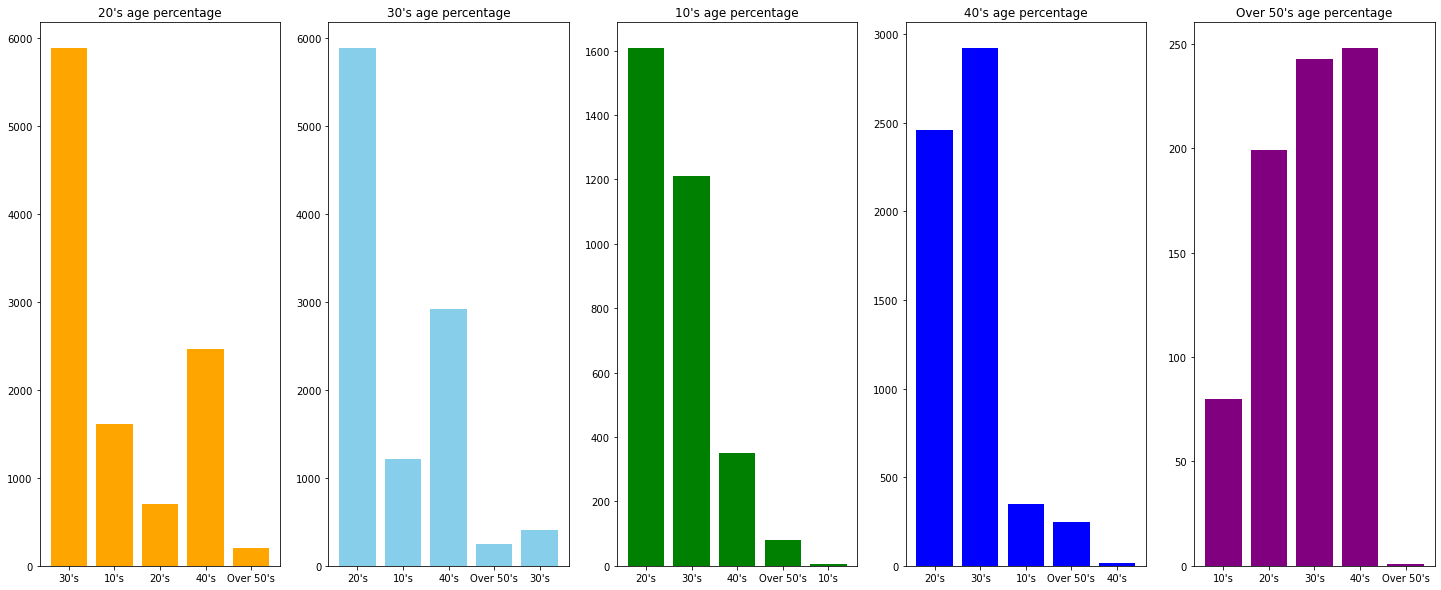

In [778]:
# Draw Pie Graph
fig, axs = plt.subplots(1, 5, figsize=[25, 10])
color = ['orange', 'skyblue', 'green', 'blue', 'purple']

for i, key in enumerate(age_dict.keys()):
    axs[i].set_title(key+' age percentage')
    axs[i].bar(age_dict[key].keys(), age_dict[key].values(), color = color[i])
plt.savefig('./age percentage')

In [768]:
age_dict

{"20's": defaultdict(int,
             {"30's": 5887,
              "10's": 1608,
              "20's": 702,
              "40's": 2461,
              "Over 50's": 199}),
 "30's": defaultdict(int,
             {"20's": 5887,
              "10's": 1210,
              "40's": 2921,
              "Over 50's": 243,
              "30's": 407}),
 "10's": defaultdict(int,
             {"20's": 1608,
              "30's": 1210,
              "40's": 349,
              "Over 50's": 80,
              "10's": 5}),
 "40's": defaultdict(int,
             {"20's": 2461,
              "30's": 2921,
              "10's": 349,
              "Over 50's": 248,
              "40's": 17}),
 "Over 50's": defaultdict(int,
             {"10's": 80,
              "20's": 199,
              "30's": 243,
              "40's": 248,
              "Over 50's": 1})}

In [ ]:
# Segment Distribution for Each Fashion Elements
'''
Is time-series between each segments different?
Is there any useful information in segments?
'''
age_dict

In [11]:
def acf(series, lag):
    if lag == 0:
        corr = 1.0
    else:
        mean = np.mean(series)
        var = np.var(series)
        covar = np.sum((series[:-lag] - mean) * (series[lag:] - mean)) / len(series)
        corr = covar / var
    return corr

In [484]:
def isWhiteNoise(series):
    auto_corr = np.array([acf(series, x) for x in range(len(series))])
    upper_bound = 2.0 / np.sqrt(len(auto_corr))
    lower_bound = - 2.0 / np.sqrt(len(auto_corr))
    inBound = len(auto_corr[np.logical_and(auto_corr <= upper_bound, auto_corr >= lower_bound)])
    per_inBound = inBound / len(series)
    if per_inBound >= 0.95:
        return True
    else:
        return False

In [13]:
def slidingVariance(series):
    pass

In [532]:
# Check How much White Noise Contains for Each Group / Using ACF
import pandas as pd
from collections import defaultdict

per_WN_group = defaultdict(float)
num_WN_FE = defaultdict(int)
num_WN_group = defaultdict(int)

num_wn_total = 0
num_ts = 0

for group in FIT_data.keys():
    num_wn = 0
    num_FE = 0
    
    for FE, res in FIT_data[group].items():
        series = [x[1] for x in res]
        num_ts += 1
        if isWhiteNoise(series):
            num_wn_total += 1
            num_wn += 1
            num_WN_FE[FE] += 1
            num_WN_group[group] += 1
        num_FE += 1
    
    per_WN_group[group] = num_wn / num_FE

print(num_wn_total)
print(num_ts)

389
8808


In [487]:
seq = [x[1] for x in oms_data["location:Global__segment:Macro__target_age:20's"]['color:Grey']]
isWhiteNoise(seq)

False

In [355]:
# Check How much White Noise Contains for Each Group / Using ACF
import pandas as pd
from collections import defaultdict

per_WN_group = defaultdict(float)
num_WN_FE = defaultdict(int)
num_WN_group = defaultdict(int)

num_wn_total = 0
num_ts = 0

for group in FIT_data.keys():
    num_wn = 0
    num_FE = 0
    
    for FE, res in FIT_data[group].items():
        series = [x[1] for x in res]
        num_ts += 1
        if isWhiteNoise(series):
            num_wn_total += 1
            num_wn += 1
            num_WN_FE[FE] += 1
            num_WN_group[group] += 1
        num_FE += 1
    
    per_WN_group[group] = num_wn / num_FE

print(num_wn_total)
print(num_ts)

389
8808


In [356]:
FIT_total_num = num_wn_total
num_ts_FIT = num_ts

In [34]:
# percentage for Segment
segment = defaultdict(float)
for group, num in num_WN_group.items():
    segment[group.split('__')[1]] += num

segment

defaultdict(<class 'float'>, {'segment:Nano': 1972.0, 'segment:Micro': 1547.0, 'segment:Mega': 2083.0, 'segment:Macro': 1469.0})


In [40]:
# percentage for Age
age = defaultdict(float)
for group, num in num_WN_group.items():
    age[group.split('__')[2]] += num
age

defaultdict(<class 'float'>, {"target_age:20's": 1021.0, "target_age:30's": 1028.0, "target_age:40's": 1309.0, "target_age:10's": 1630.0, "target_age:Over 50's": 2083.0})


In [44]:
# percentage for location
location = defaultdict(float)
for group, num in num_WN_group.items():
    location[group.split('__')[0]] += num

location

defaultdict(float, {'location:Local': 3261.0, 'location:Global': 3810.0})

In [53]:
per_WN_group = pd.Series(per_WN_group)
per_WN_group.describe()

count    40.000000
mean      0.600171
std       0.259189
min       0.155629
25%       0.379967
50%       0.589404
75%       0.850527
max       0.976744
dtype: float64

In [52]:
pd.Series(num_WN_FE).describe()

count    302.000000
mean      23.413907
std        9.780865
min        1.000000
25%       15.250000
50%       25.000000
75%       32.000000
max       40.000000
dtype: float64

In [298]:
wn_FE = defaultdict(bool)

num_FE = 0
num_WN = 0
for FE, res in oms_data_fl.items():
    seq = [x[1] for x in res]
    if isWhiteNoise(seq):
        wn_FE[FE] = True
        num_WN += 1
    num_FE += 1

print(wn_FE)
print(num_WN / num_FE)

defaultdict(<class 'bool'>, {'item:Leggings': True, 'item:Bra Top': True, 'item:Body Suit': True, 'item:H-line Skirt': True, 'collar:Non-Collar Lapel': True, 'collar:Cascade': True, 'color:Purple': True, 'shape:Bell Bottoms / Flare': True, 'print:Gradation': True, 'design_detail:Lace-up ': True, 'design_detail:Pompom': True, 'sleeve_shape:Dolman / Batwing': True, 'item:Pencil Skirt': True, 'item:Vest Suit': True, 'item:Wedding Dress': True, 'item:Bustier': True, 'item:Rain Coat': True, 'shape:Bell Bottom / Flare': True, 'collar:Peter Pan Collar': True, 'collar:Bertha Collar': True, 'design_detail:Washed': True, 'design_detail:Chain': True, 'item:Bolero': True, 'print:Skull / Gothic': True, 'item:Western Jacket': True, 'collar:Dog Ear': True, 'sleeve_shape:Petal': True, 'design_detail:Pearl': True, 'design_detail:Sash': True, 'item:Yoga Pants': True})
0.09933774834437085


In [81]:
import glob

dataset_path = '/home/omnious/workspace/hojun/KERN/Influencer_Export_autotagged/'
nonempty_data = os.path.join(dataset_path, "nonempty_influencer_json")

num_loc = 0
num_seg = 0

for file in glob.glob(os.path.join(nonempty_data, '*.json')):
    with open(file) as json_file:
        data = json.load(json_file)
        loc = [x["name"] for x in data["location"]]
        seg = [x["name"].split()[0].strip() for x in data["segment"]]
        if len(loc) > 1:
            num_loc += 1
        if len(seg) > 1:
            num_seg += 1

print(num_loc)
print(num_seg)
        

135
0


In [594]:
def set_location(data):
    if data['location']:
        locations = ['location:'+x['name'] for x in data['location']]
        return locations
    else:
        return False

In [120]:
def set_segments(data):
    if data['segment']:
        segments = data['segment'][0]['name'].split()[0].strip()
        return ['segment:'+segments]
    else:
        return False

In [582]:
def set_age(data, replace_dict):
    if data['target_age']:
        target_age = ['target_age:'+x['name'].split("''")[0].strip() for x in data['target_age']]
        
        for remove in replace_dict.keys():
            if remove in target_age:
                target_age.remove(remove)
                if not replace_dict[remove] in target_age:
                    target_age.append(replace_dict[remove])
        
        return target_age
    else:
        return False

In [664]:
def set_gender(data):
    if len(data['gender']) >=2:
        print('Wow')
    if data['gender']:
        gender = data['gender'][0]['name']
        return ['gender:'+gender]
    else:
        return False
        

In [308]:
def create_IG_FE_Pairs(post, influGroup, white_noisedFE, T):
    postFE = []
    for bbox in post["bbox"]:
        for attribute in candidate_attributes:
            # if bbox contains candidate attributes
            if bbox[attribute]:
                # if there are multiple same Fashion Element, select only one
                uniques_elements = [ast.literal_eval(el1) for el1 in set([str(el2) for el2 in bbox[attribute]])]
                for element in uniques_elements:
                    if element["name"]:
                        fe = ":".join([attribute, element["name"]])
                        # if fashion element in White Noise Fashion Element, remove it
                        if not fe in white_noisedFE:
                            postFE.append(fe)
        influ_FE_Pairs = [influGroup, postFE]
        influ_FE_Pairs = list(itertools.product(*influ_FE_Pairs))
        
        return influ_FE_Pairs

In [841]:
def group_two(Permutations, pop_group):
    
    # drop one group attribute and create user group
    
    # pop group must be group attribute
    assert pop_group in ['location', 'segment', 'target_age']
    
    add_permu = []
    # pop out pop_group attribute
    for permutation in Permutations:
        new_group = []
        for group in permutation:
            if not pop_group in group:
                new_group.append(group)
        add_permu.append(new_group)
    
    Permutations.extend(add_permu)
    
    return Permutations
    

In [295]:
from datetime import timedelta

def date2week(upload_date, start_date):
    # e.g. upload_date =  "2020-11-14 10:27:43 | Week starts from monday"
    upload_date, start_date = pd.to_datetime(upload_date), pd.to_datetime(start_date)
   
    upload_date = upload_date - timedelta(upload_date.weekday())
    start_date = start_date - timedelta(start_date.weekday())
    
    week_no = upload_date.replace(hour=0, minute=0, second=0) - start_date.replace(hour=0, minute=0, second=0)
    week_no = int(week_no / np.timedelta64(1, 'W'))
    
    return week_no

def format_week(w, start_date):
    # Covert week_no to week of the year
    upload_date = pd.to_datetime(start_date) + timedelta(weeks=w)
    return upload_date.week - 1

In [935]:
#upload_date = "2021-01-11 10:27:43"
#upload_date = "2019-12-30 22:01:19"
#upload_date = "2019-11-10 22:01:19"
#upload_date = "2019-01-06 22:01:19"

#upload_date = "2020-12-28 22:01:19"
#upload_date = "2019-11-03 18:33:22" # earliest date
upload_date = "2020-12-31 18:30:32" # latest week
start_date = "2019-11-01 18:33:22"
end_date = "2021-06-28 07:07:42"
week_no = date2week(end_date, start_date)
week_no
#format_week(week_no, start_date)
#print("date: ", upload_date, "week_no: ", week_no, format_week(week_no))

87

In [843]:
import itertools

dataset_path = '/home/omnious/workspace/hojun/KERN/Influencer_Export_autotagged/'
nonempty_data = os.path.join(dataset_path, "nonempty_influencer_json")

put_loc = True
put_seg = True
put_age = True
put_all = False
two_grouping = True

In [754]:
import ast

white_noisedFE = []
T = 88
start_date = "2019-11-01 18:33:22"
replace_age={"target_age:Over 50's":"target_age:40's"}

In [895]:
all_datadate_attributes = ['item', 'color', 'length', 'fit', 'shape', 'neckline', 'collar', 
                        'look', 'gender', 'sleeve_length', 'sleeve_shape', 'design_detail', 'material', 'print']
all_data = {}


for file in glob.glob(os.path.join(nonempty_data, '*.json')):
    with open(file) as json_file:
        data = json.load(json_file)
        
        # Creating groups
        forPermutation = []
        if put_loc:
            forPermutation.append(set_location(data))
        
        if put_seg:
            forPermutation.append(set_segments(data))
        
        if put_age:
            forPermutation.append(set_age(data, replace_age))
        
        # If there are missing value, skip it
        if False in forPermutation:
            continue
        allPermutations = list(itertools.product(*forPermutation))
        
        if put_all:
            allPermutations.append(['location:All', 'segment:All', 'target_age:All'])
        
        if two_grouping:
            allPermutations = group_two(allPermutations, 'target_age')
        
        # Naming the group
        currInfluGroups = ['__'.join(p) for p in allPermutations]
        # Preprocessing posts
        posts = data["posts"]
        
        for post in posts:
            IG_FE_Pairs = create_IG_FE_Pairs(post, currInfluGroups, white_noisedFE, T)
            
            upload_date = post["upload_date"]
            week_no = date2week(upload_date, start_date)
            
            for (IG, FE) in IG_FE_Pairs:
                # all_data[IG] = {FE: [[week_no, 1]]}
                if IG not in all_data.keys():
                    all_data[IG] = {FE: [[x, 0] for x in range(T)]}
                if FE not in all_data[IG].keys():
                    all_data[IG][FE] = [[x, 0] for x in range(T)]
                try:
                    all_data[IG][FE][week_no][1] += 1
                except:
                    pass


In [317]:
# How many dataset which upload date is under than 2019-11-01

dataset_path = '/home/omnious/workspace/hojun/KERN/Influencer_Export_autotagged/'
oms_influ_data = os.path.join(dataset_path, "influencer_json")

num_posts = 0
num_posts_before_start_date = 0
start_date = pd.to_datetime("2019-11-01 18:33:22")

for file in glob.glob(os.path.join(oms_influ_data, '*.json')):
    with open(file) as json_file:
        data = json.load(json_file)
        posts = data["posts"]
        for post in posts:
            upload_date = pd.to_datetime(post['upload_date'])
            if upload_date < start_date:
                num_posts_before_start_date += 1
            num_posts += 1

1547756
5741


In [385]:
print('number of older data : ' + str(num_posts_before_start_date) + ', number of posts : ' + str(num_posts))

number of older data : 5741, number of posts : 1547756


In [418]:
# Remove spare sequence
def remove_sparse_seq(data, rate=0.5):
    removed = 0
    total = 0
    # remove data with sparsity >= rate
    for group in data.keys():
        for FE, res in list(data[group].items()):
            per = len([x[1] for x in res if x[1] == 0]) / len(res)
            if per >= rate:
                removed += 1
                del data[group][FE]
            total += 1
    print("removed : " + str(removed) + " total : " + str(total))
    return data


In [ ]:
remove_sparse_seq(all_data)

In [899]:
all_data = remove_sparse_seq(all_data)

removed : 2074 total : 12030


In [900]:
test = copy.deepcopy(all_data)

In [901]:
test.keys()

dict_keys(["location:Global__segment:Nano__target_age:20's", "location:Global__segment:Nano__target_age:30's", 'location:Global__segment:Nano', "location:Global__segment:Micro__target_age:20's", "location:Global__segment:Micro__target_age:30's", 'location:Global__segment:Micro', "location:Local__segment:Nano__target_age:10's", "location:Local__segment:Nano__target_age:20's", 'location:Local__segment:Nano', "location:Local__segment:Macro__target_age:10's", "location:Local__segment:Macro__target_age:20's", "location:Local__segment:Macro__target_age:30's", 'location:Local__segment:Macro', "location:Local__segment:Micro__target_age:20's", 'location:Local__segment:Micro', "location:Global__segment:Micro__target_age:10's", "location:Local__segment:Nano__target_age:30's", "location:Local__segment:Nano__target_age:40's", "location:Local__segment:Micro__target_age:30's", "location:Local__segment:Micro__target_age:40's", "location:Local__segment:Mega__target_age:20's", "location:Local__segment:M

In [925]:
def ranking(data):
    
    #assert opt.ranking in ['category', 'num_group']
    Tmax = 88
    ranking = 'category'
    for influencer in list(data.keys()):
        for t in range(Tmax):
            Nt = defaultdict(int)
            for fashion in list(data[influencer].keys()):
                if ranking == 'category':
                    denominator = fashion.split(":")[0]
                else:
                    denominator = influencer 
                Nt[denominator] += list(data[influencer][fashion][t])[1]
            
            for fashion in data[influencer].keys():
                if ranking == 'category':
                    denominator = fashion.split(":")[0]
                else:
                    denominator = influencer
                if not Nt[denominator] == 0:
                    data[influencer][fashion][t][1] /= float(Nt[denominator])
                if data[influencer][fashion][t][1] > 1.0 or data[influencer][fashion][t][1] < 0:
                    print('Error')

In [557]:
def time_normalize(all_data):
    norm_all_data = {}
    norm_data_stat = {}
    eps = 0.01
    #eps = 0.0

    for influencer in list(all_data.keys()):
        for fashion in list(all_data[influencer].keys()):
            week_num = all_data[influencer][fashion]
            timeline = [int(x[0]) for x in week_num]
            trend = [x[1] for x in week_num]
            if len(trend) == 0 or len(timeline) == 0:
                print("empty 1: ", influencer, fashion, len(trend), len(timeline))
                continue
        
            max_v = max(trend)
            min_v = min(trend)
            normed_trend = [max((x-min_v)/(max_v-min_v + 1e-20), eps) for x in trend]
            res = []
            for time_s, trend_v in zip(timeline, normed_trend):
                res.append([time_s, trend_v])
        
            if len(res) == 0:
                print("empty 2: ", influencer, fashion, len(res))
        
            if influencer not in norm_all_data.keys():
                norm_all_data[influencer] = {fashion: res}
                norm_data_stat[influencer] = {fashion: [min_v, max_v, eps]}
            else:
                norm_all_data[influencer][fashion] = res
                norm_data_stat[influencer][fashion] = [min_v, max_v, eps]
    
    return norm_all_data, norm_data_stat

In [821]:
# Remove White Noise
def filter_WN(data):
    removed = 0
    total = 0
    
    for group in data.keys():
        for FE, res in list(data[group].items()):
            series = [x[1] for x in res]
            
            # Remove time series if time series is white noise
            if isWhiteNoise(series):
                removed += 1
                del data[group][FE]
            total += 1
    print("removed : " + str(removed) + " total : " + str(total))
    return data

In [926]:
all_data = copy.deepcopy(test)
all_data = ranking(all_data)

In [854]:
all_data = time_normalize(all_data)

In [855]:
norm_all_data, _ = all_data

In [856]:
norm_all_data = filter_WN(norm_all_data)

removed : 4476 total : 9956


In [857]:
# Check How much White Noise Contains for Each Group / Using ACF
import pandas as pd
from collections import defaultdict

per_WN_group = defaultdict(float)
num_WN_FE = defaultdict(int)
num_WN_group = defaultdict(int)
str_WN_group = defaultdict(list)

num_group = 0

num_wn_total = 0
num_ts = 0

for group in norm_all_data.keys():
    num_group += 1
    num_wn = 0
    num_FE = 0
    
    for FE, res in norm_all_data[group].items():
        series = [x[1] for x in res]
        num_ts += 1
        if isWhiteNoise(series):
            num_wn_total += 1
            num_wn += 1
            num_WN_FE[FE] += 1
            num_WN_group[group] += 1
            str_WN_group[group].append(FE)
        num_FE += 1
    
    per_WN_group[group] = num_wn / num_FE

print(num_wn_total)
print(num_ts)

0
5480


In [806]:
print(num_group)
num_WN_group = pd.Series(num_WN_group)
len(num_WN_group[num_WN_group >= 100])

32


21

In [858]:
'''
print(num_WN_group)
print(per_WN_group)
print(num_WN_FE)
'''
per_num = defaultdict(list)

for FE, num in num_WN_FE.items():
    per_num[num].append(FE)

num_WN_FE = pd.Series(num_WN_FE)
print(num_WN_FE.describe())
len(num_WN_FE[num_WN_FE >= 10])

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # This is added back by InteractiveShellApp.init_path()


0

In [798]:
print(len(str_WN_group['segment:Nano']))
A = set(str_WN_group['segment:Nano']).union(set(str_WN_group['segment:Mega']))
print(len(A))
A = A.union(str_WN_group['segment:Micro'])
A = A.union(str_WN_group['segment:Macro'])
print(len(A))

remove_wn_segment = copy.deepcopy(A)

0
0
0


In [609]:
per_num_loc = copy.deepcopy(per_num)
per_num_loc
print()

In [ ]:
import copy
per_num_segment = copy.deepcopy(per_num)
per_num_segment

In [859]:
mean = 0
num_series = 0
for group in norm_all_data.keys():
    for FE, res in norm_all_data[group].items():
        num_series += 1
        series = [x[1] for x in res]
        series = pd.Series(series)
        mean += series.describe()['mean']
print(mean / num_series)

0.39111407573309


In [809]:
num_FE_group = defaultdict(int)

# check the distribution of FIT dataset
for group, res in FIT_data.items():
    for FE, seq in res.items():
        num_FE_group[group] += 1

num_FE_group = pd.Series(num_FE_group)

In [810]:
num_FE_group.describe()

count     74.000000
mean     119.027027
std       36.362698
min       16.000000
25%      106.250000
50%      116.500000
75%      152.250000
max      173.000000
dtype: float64

In [860]:
omns_num_FE_group = defaultdict(int)

for group, res in norm_all_data.items():
    for FE, seq in res.items():
        omns_num_FE_group[group] += 1

omns_num_FE_group = pd.Series(omns_num_FE_group)

In [865]:
omns_num_FE_group.describe()

count     40.000000
mean     137.000000
std       66.760191
min        8.000000
25%       87.250000
50%      137.500000
75%      176.250000
max      250.000000
dtype: float64

In [834]:
how_divide = defaultdict(int)

for group, _ in FIT_data.items():
    if 'age:' in group:
        how_divide[group]+=1
    if 'city:' in group:
        how_divide[group]+=1
    if 'gender:' in group:
        how_divide[group]+=1

how_divide = pd.Series(how_divide)
print(len(how_divide[how_divide==2]))
print(len(how_divide[how_divide==3]))

28
46


[Text(0.5, 0, 'FIT'), Text(0, 0.5, '# FE')]

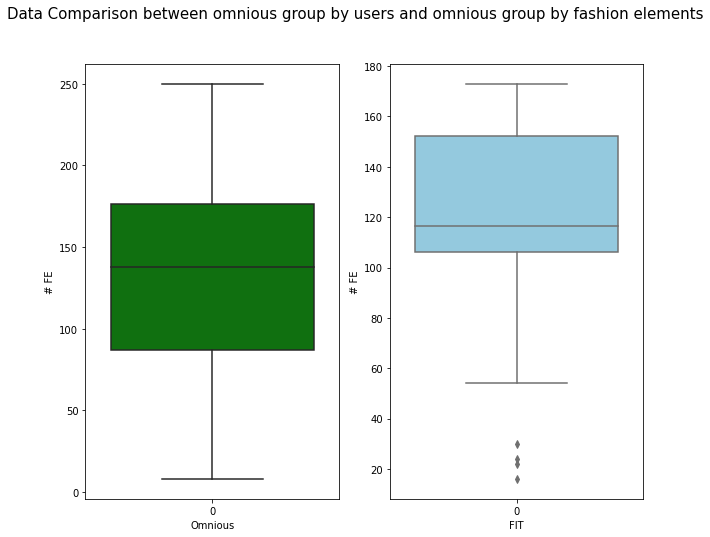

In [866]:
# visualize results with box-plot
fig, axes = plt.subplots(1, 2, figsize=(10, 8))
fig.suptitle('Data Comparison between omnious group by users and omnious group by fashion elements', fontsize=15)
# omnious dataset group by fashion elemnts
sns.boxplot(data=omns_num_FE_group, ax=axes[0], color='green').set(xlabel='Omnious', ylabel='# FE')
# Omnious dataset group by users
sns.boxplot(data=num_FE_group, ax=axes[1], color='skyblue').set(xlabel='FIT', ylabel='# FE')

In [862]:
# Visualize time-series for each fashion elements

num_FE_oms = defaultdict(int)

for group, res in norm_all_data.items():
    for ele, seq in res.items():
        num_FE_oms[ele] += 1

num_FE_oms = pd.Series(num_FE_oms)
num_FE_oms.describe()

count    271.000000
mean      20.221402
std       11.273817
min        1.000000
25%       11.000000
50%       19.000000
75%       30.000000
max       40.000000
dtype: float64

In [863]:
num_FE_FIT = defaultdict(int)

for group, res in FIT_data.items():
    for ele, seq in res.items():
        num_FE_FIT[ele] += 1

num_FE_FIT = pd.Series(num_FE_FIT)
num_FE_FIT.describe()

count    173.000000
mean      50.913295
std       20.855775
min        1.000000
25%       37.000000
50%       58.000000
75%       70.000000
max       74.000000
dtype: float64

[Text(0.5, 0, 'Omnious Dataset'), Text(0, 0.5, 'Score')]

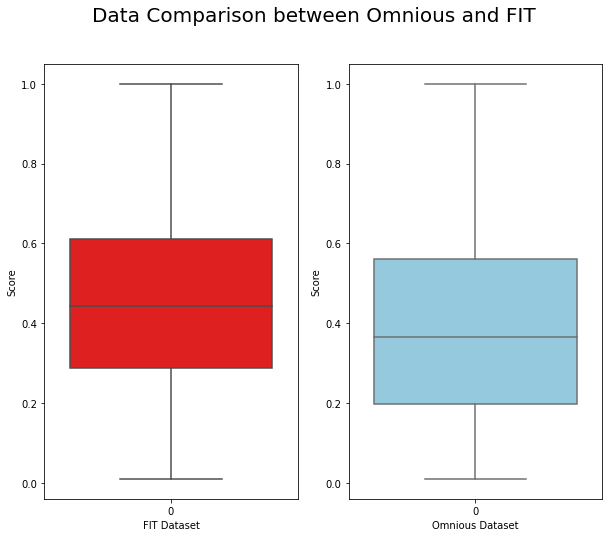

In [864]:
oms_all = []
for group, res in norm_all_data.items():
    for ele, seq in res.items():
        oms_all.extend([x[1] for x in seq])

# visualize results with box-plot
fig, axes = plt.subplots(1, 2, figsize=(10, 8))
fig.suptitle('Data Comparison between Omnious and FIT', fontsize=20)
# FIT dataset
sns.boxplot(data=FIT_all, ax=axes[0], color='red').set(xlabel='FIT Dataset', ylabel='Score')
# Omnious dataset
sns.boxplot(data=oms_all, ax=axes[1], color='skyblue').set(xlabel='Omnious Dataset', ylabel='Score')

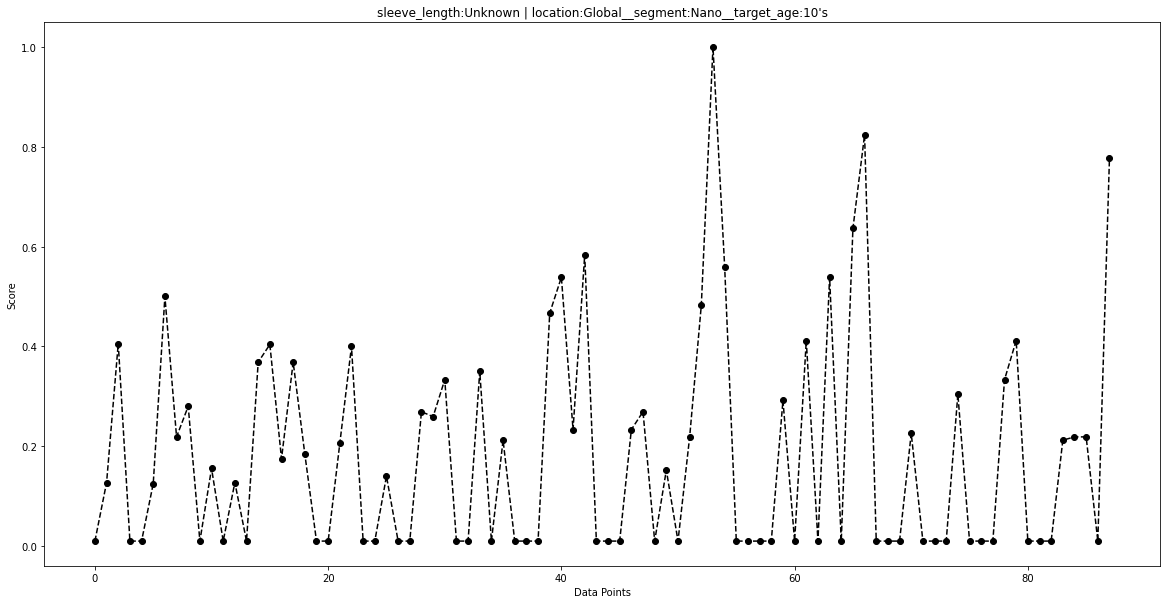

In [962]:
plt.figure(figsize=(20, 10))

with open('../dataset/omnious/omnious_trend.json') as oms_path:

    fig_save_dir = '../dataset/time_series_new_omns/'
    oms_dataset = json.load(oms_path)
    for group in oms_dataset.keys():
        for FE, seq in oms_dataset[group].items():
            x = [i for i in range(len(seq))]
            y = [data[1] for data in seq]
            plt.clf()
            plt.title(FE+' | '+ group)
            plt.plot(x, y, 'go--', color='black')
            #plt.axvline(x=8, label='Year 2020', color='red')
            #plt.axvline(x=62, label='Year 2021', color='blue')
            plt.xlabel('Data Points')
            plt.ylabel('Score')
            #plt.legend()
            if not os.path.exists(os.path.join(fig_save_dir, FE)):
                os.makedirs(os.path.join(fig_save_dir, FE))
            directory_path = os.path.join(fig_save_dir, FE)
            plt.savefig(os.path.join(directory_path, group+'.png'))

In [882]:
a = []
if not 'a' in a:
    a.append('a')
    
a

['a']

In [889]:
test = defaultdict(list)
test['a'] = [1, 2, 3, 4]
test['b'] = [5, 6, 7, 8]
test['c'] = False
test['d'] = True

list(test.values())

if True in test.values():
    print('yes')

yes


In [892]:
remove = set(['a', 'b'])
a = set(['a', 'b', 'c'])
if remove in a:
    print('yes')
remove

{'a', 'b'}

In [953]:
norm_all_data.keys()

dict_keys(["location:Global__segment:Nano__target_age:20's", "location:Global__segment:Nano__target_age:30's", 'location:Global__segment:Nano', "location:Global__segment:Micro__target_age:20's", "location:Global__segment:Micro__target_age:30's", 'location:Global__segment:Micro', "location:Local__segment:Nano__target_age:10's", "location:Local__segment:Nano__target_age:20's", 'location:Local__segment:Nano', "location:Local__segment:Macro__target_age:10's", "location:Local__segment:Macro__target_age:20's", "location:Local__segment:Macro__target_age:30's", 'location:Local__segment:Macro', "location:Local__segment:Micro__target_age:20's", 'location:Local__segment:Micro', "location:Global__segment:Micro__target_age:10's", "location:Local__segment:Nano__target_age:30's", "location:Local__segment:Nano__target_age:40's", "location:Local__segment:Micro__target_age:30's", "location:Local__segment:Micro__target_age:40's", "location:Local__segment:Mega__target_age:20's", "location:Local__segment:M

In [930]:
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('--dataset_path', type=str, default='./Influencer_Export_autotagged/',
                        help="path to data with files")
parser.add_argument('--merge_groups', type=bool, default=True, help='merge some influencer groups if True')
parser.add_argument("--num_data_points", type=int, default=88, help='number of data points')
parser.add_argument("--sparsity", type=int, default=0.5,
                        help="if sparsity > 0, remove sequences with sparsity*100 sequnces ")
parser.add_argument('--save_data_file', default='new_data.json', help='name of created data .json file')
parser.add_argument('--save_data_norm_file', default='new_data_norm.json',
                        help='name of created data norm .json file')

opt = parser.parse_args()

usage: ipykernel_launcher.py [-h] [--dataset_path DATASET_PATH]
                             [--merge_groups MERGE_GROUPS]
                             [--num_data_points NUM_DATA_POINTS]
                             [--sparsity SPARSITY]
                             [--save_data_file SAVE_DATA_FILE]
                             [--save_data_norm_file SAVE_DATA_NORM_FILE]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/omnious/.local/share/jupyter/runtime/kernel-88de9c29-b267-4d10-a4f2-c914d1ba916b.json


SystemExit: 2

In [946]:
import datetime
str(datetime.datetime.now().replace(microsecond=0))

'2021-08-26 16:22:00'

In [951]:
a = np.array([[1, 2, 3], [4, 6 ,7], [11, 2, 3]])
a[:, 0:2]

array([[ 1,  2],
       [ 4,  6],
       [11,  2]])

In [952]:
np.array([j for j in range(a.shape[0])])

array([0, 1, 2])

In [959]:
replace_dict = json.load(open('../dataset/replace.json'))
if replace_dict['location']:
    print('True')
if replace_dict['target_age']:
    print('True')

True
